# 개요
한국 프로야구 한화이글스 팬으로 2023시즌 홈런왕인 노시환 선수의 홈런왕 기념으로 2024시즌 노시환 선수의 홈런 개수를 예측해 보려고 한다.

## 컬럼 명 설명
경기 (Games, G): 선수가 참여한 총 경기 수입니다.

타석 (Plate Appearances, PA): 타자가 타격을 시도한 총 횟수로, 볼넷, 삼진, 안타 등 타자가 타석에 서는 모든 상황을 포함합니다.

타수 (At Bats, AB): 타자가 정식으로 타격을 시도하여 결과가 기록된 횟수로, 볼넷, 희생타, 몸에 맞는 볼 등은 제외됩니다.

안타 (Hits, H): 타자가 타격하여 베이스에 안전하게 도달한 횟수입니다.

홈런 (Home Runs, HR): 타자가 타격하여 공이 경기장 바깥으로 나가 한 번에 홈까지 도달하는 안타입니다.

득점 (Runs, R): 타자 또는 주자가 홈 베이스를 밟아 한 점을 올리는 것입니다.

타점 (Runs Batted In, RBI): 타자의 타격으로 주자가 득점을 올린 횟수입니다.

볼넷 (Base on Balls, BB): 타자가 투수로부터 네 번의 '볼'을 받아 1루로 진출하는 것입니다.

삼진 (Strikeouts, SO or K): 타자가 세 번의 '스트라이크'를 받고 아웃되는 것입니다.

도루 (Stolen Bases, SB): 주자가 투수의 공이 투구되는 동안 다음 베이스로 진루하는 것을 성공하는 것입니다.

BABIP (Batting Average on Balls In Play): 타자가 타구를 날렸을 때 안타가 될 확률을 나타내며, 수비수에게 잡히지 않은 타구의 타율입니다.

타율 (Batting Average): 공식 타석에서 안타를 칠 확률로, 안타 수를 타석 수로 나눈 값입니다.

출루율 (On-Base Percentage): 타자가 얼마나 자주 출루하는지 나타내는 비율로, (안타+볼넷+사구)/(타석+볼넷+사구+희생플라이)로 계산합니다.

장타율 (Slugging Percentage): 타자가 타석에서 기록한 총 베이스를 공식 타석 수로 나눈 값입니다.

OPS (On-base Plus Slugging): 출루율과 장타율을 합한 값으로, 타자의 전반적인 공격 기여도를 평가합니다.

wOBA (Weighted On-Base Average): 타자의 출루율을 더 세밀하게 가중치를 두어 계산한 통계로, 다양한 출루 방식을 점수화하여 평균을 낸 것입니다.

WAR (Wins Above Replacement): 대체 선수 대비 해당 선수가 팀에 가져다 준 승리의 가치를 나타냅니다.

단타 (Single): 타자가 타격하여 1루까지만 진루하는 안타입니다.

고4 (Base on Balls, Walk): 투수가 4구의 볼을 던져 타자가 1루로 진루하는 것입니다.

HBP (Hit By Pitch): 투수가 던진 공에 타자가 맞아 1루로 진루하는 것입니다.

희플 (Sacrifice Fly): 타자가 날린 뜬공을 잡아 아웃되지만, 이를 통해 주자가 득점하는 것입니다.

희타 (Sacrifice Hit, Sacrifice Bunt): 희생번트로, 타자가 고의로 아웃되어 주자를 진루시키는 타격입니다.

병살 (Double Play): 수비가 한 번의 플레이로 두 명의 주자를 아웃시키는 것입니다.

도실 (Stolen Base Percentage): 성공적으로 도루를 시도한 비율을 나타냅니다.

볼넷% (Walk Percentage): 타석 대비 볼넷을 얻는 비율입니다.

삼진% (Strikeout Percentage): 타석 대비 삼진을 당하는 비율입니다.

볼/삼 (BB/K): 볼넷 수를 삼진 수로 나눈 비율입니다.

ISO (Isolated Power): 타자의 장타력을 나타내는 지표로, 장타율에서 타율을 뺀 값입니다.

RC (Runs Created): 타자가 만들어낸 득점을 추정하는 통계입니다.

RC/27 (Runs Created per 27 Outs): 27아웃당 만들어낼 것으로 예상되는 득점을 나타냅니다

wRC (Weighted Runs Created): 타자가 만들어낸 득점을 조정하여, 리그 평균과 구장 특성을 반영한 통계입니다.

SPD (Speed Score): 선수의 주루 능력을 종합적으로 나타내는 점수로, 도루 성공률, 1루에서 3루까지 진루 능력 등 여러 요소를 종합한 것입니다.

wSB (Weighted Stolen Bases): 도루가 팀에 가져다 준 기대 득점을 가중치를 적용하여 계산한 값입니다.

wRAA (Weighted Runs Above Average): 리그 평균 선수 대비 해당 타자가 만들어낸 득점의 가치를 나타내는 통계입니다.

In [1]:
# 필요 모듈 및 라이브러리 import

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import copy


#시각화 관련 라이브러리 import
import matplotlib as plt
import seaborn as sns
import matplotlib.font_manager as fm

import pandas as pd

#모델 관련 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

## 데이터 수집
프로야구 기록 사이트에서 노시환 선수의 프로기록을 크롤링을 통해 가져온다.

In [2]:
url = "http://www.kbreport.com/player/detail/1652#p3"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all('table', class_='ltb-table responsive')

# 각 테이블 데이터를 저장할 변수 초기화
table1_data = []
table2_data = []
table3_data = []

# 각 테이블에 대해 반복
for index, table in enumerate(tables):
    rows = table.find_all('tr')
    table_data = []

    for row in rows:
        cols = row.find_all(['td', 'th'])
        cols = [ele.text.strip() for ele in cols]
        table_data.append(cols)

    # 각 테이블 데이터를 해당 변수에 할당
    if index == 0:
        table1_data = table_data
    elif index == 1:
        table2_data = table_data
    elif index == 2:
        table3_data = table_data

In [3]:
# 데이터 확인 table1_data
print(type(table1_data))
print(table1_data)

<class 'list'>
[['시즌', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루', 'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR'], ['2023', '한화', '131', '595', '514', '153', '31', '85', '101', '74', '118', '2', '0.332', '0.298', '0.388', '0.541', '0.929', '0.408', '6.63', '2022', '한화', '115', '490', '434', '122', '6', '55', '59', '48', '95', '6', '0.344', '0.281', '0.355', '0.382', '0.737', '0.337', '2.00', '2021', '한화', '107', '458', '380', '103', '18', '56', '84', '73', '107', '5', '0.328', '0.271', '0.386', '0.466', '0.852', '0.380', '3.56', '2020', '한화', '106', '387', '346', '76', '12', '46', '43', '33', '116', '0', '0.292', '0.220', '0.298', '0.387', '0.685', '0.305', '0.11', '2019', '한화', '91', '192', '177', '33', '1', '19', '13', '11', '72', '2', '0.305', '0.186', '0.241', '0.260', '0.501', '0.233', '-1.29'], ['2022', '한화', '115', '490', '434', '122', '6', '55', '59', '48', '95', '6', '0.344', '0.281', '0.355', '0.382', '0.737', '0.337', '2.00', '2021', '한화', '107', '4

In [4]:
# 데이터 확인 table2_data
print(type(table2_data))
print(table2_data)

<class 'list'>
[['시즌', '팀명', '경기', '타석', '타수', '안타', '단타', '2루타', '3루타', '홈런', '득점', '타점', '볼넷', '고4', 'HBP', '삼진', '희플', '희타', '병살', '도루', '도실', '타율'], ['2023', '한화', '131', '595', '514', '153', '91', '30', '1', '31', '85', '101', '74', '5', '4', '118', '3', '3', '13', '2', '1', '0.298', '2022', '한화', '115', '490', '434', '122', '91', '24', '1', '6', '55', '59', '48', '1', '4', '95', '4', '4', '13', '6', '2', '0.281', '2021', '한화', '107', '458', '380', '103', '66', '18', '1', '18', '56', '84', '73', '9', '1', '107', '4', '4', '15', '5', '2', '0.271', '2020', '한화', '106', '387', '346', '76', '44', '18', '2', '12', '46', '43', '33', '1', '6', '116', '1', '2', '8', '0', '1', '0.220', '2019', '한화', '91', '192', '177', '33', '23', '8', '1', '1', '19', '13', '11', '0', '2', '72', '1', '2', '3', '2', '2', '0.186'], ['2022', '한화', '115', '490', '434', '122', '91', '24', '1', '6', '55', '59', '48', '1', '4', '95', '4', '4', '13', '6', '2', '0.281', '2021', '한화', '107', '458', '380', '103', '66

In [5]:
# 데이터 확인 table3_data
print(type(table3_data))
print(table3_data)

<class 'list'>
[['시즌', '팀명', '타석', '타율', 'BABIP', '볼넷%', '삼진%', '볼/삼', 'ISO', '타수/홈런', 'OPS', 'RC', 'RC/27', 'wRC', 'SPD', 'wSB', 'wOBA', 'wRAA', 'WAR'], ['2023', '한화', '595', '0.298', '0.332', '12.4', '19.8', '0.63', '0.243', '16.58', '0.929', '109.28', '7.81', '111.02', '2.78', '-0.39', '0.408', '40.95', '6.63', '2022', '한화', '490', '0.281', '0.344', '9.8', '19.4', '0.50', '0.101', '72.33', '0.737', '60.04', '4.90', '62.15', '3.46', '0.29', '0.337', '5.03', '2.00', '2021', '한화', '458', '0.271', '0.328', '15.9', '23.4', '0.68', '0.195', '21.11', '0.852', '69.49', '6.30', '73.80', '2.37', '0.02', '0.380', '17.48', '3.56', '2020', '한화', '387', '0.220', '0.292', '8.5', '30.0', '0.28', '0.167', '28.83', '0.685', '39.73', '3.82', '37.62', '3.25', '-0.09', '0.305', '-13.18', '0.11', '2019', '한화', '192', '0.186', '0.305', '5.7', '37.5', '0.15', '0.074', '177.00', '0.501', '11.04', '1.97', '6.26', '4.87', '-0.54', '0.233', '-16.33', '-1.29'], ['2022', '한화', '490', '0.281', '0.344', '9.8', '19

## 데이터 전처리
불러온 세 개의 테이블 데이터를 전처리와 하나의 테이블로 만들고 
해당 데이터를 csv파일로 저장한다.

In [6]:
#원본 리스트 데이터 df형태로 변경
df1 = pd.DataFrame(table1_data)
df2 = pd.DataFrame(table2_data)
df3 = pd.DataFrame(table3_data)

In [7]:
df1

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,시즌,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,None,None,None,None,None,None,None,None,None,None
1,2023,한화,131,595,514,153,31,85,101,74,...,11,72,2,0.305,0.186,0.241,0.260,0.501,0.233,-1.29
2,2022,한화,115,490,434,122,6,55,59,48,...,None,None,None,None,None,None,None,None,None,None
3,2021,한화,107,458,380,103,18,56,84,73,...,None,None,None,None,None,None,None,None,None,None
4,2020,한화,106,387,346,76,12,46,43,33,...,None,None,None,None,None,None,None,None,None,None
5,2019,한화,91,192,177,33,1,19,13,11,...,None,None,None,None,None,None,None,None,None,None


In [8]:
# 행, 열 인덱스 변경
dataframes = [df1, df2, df3]
for df in dataframes:
    df.columns = df.iloc[0]
    df.drop(df.index[0], inplace = True)
    df.set_index('시즌', inplace = True)

In [9]:
for df in dataframes:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2023 to 2019
Data columns (total 94 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   팀명      5 non-null      object
 1   경기      5 non-null      object
 2   타석      5 non-null      object
 3   타수      5 non-null      object
 4   안타      5 non-null      object
 5   홈런      5 non-null      object
 6   득점      5 non-null      object
 7   타점      5 non-null      object
 8   볼넷      5 non-null      object
 9   삼진      5 non-null      object
 10  도루      5 non-null      object
 11  BABIP   5 non-null      object
 12  타율      5 non-null      object
 13  출루율     5 non-null      object
 14  장타율     5 non-null      object
 15  OPS     5 non-null      object
 16  wOBA    5 non-null      object
 17  WAR     5 non-null      object
 18  None    4 non-null      object
 19  None    4 non-null      object
 20  None    4 non-null      object
 21  None    4 non-null      object
 22  None    4 non-null      objec

In [10]:
# 열 이름 none 삭제
for df in dataframes:
    columns_drop = [col for col in df.columns if col is None]
    df.drop(columns = columns_drop, inplace = True)

In [11]:
for df in dataframes:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2023 to 2019
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   팀명      5 non-null      object
 1   경기      5 non-null      object
 2   타석      5 non-null      object
 3   타수      5 non-null      object
 4   안타      5 non-null      object
 5   홈런      5 non-null      object
 6   득점      5 non-null      object
 7   타점      5 non-null      object
 8   볼넷      5 non-null      object
 9   삼진      5 non-null      object
 10  도루      5 non-null      object
 11  BABIP   5 non-null      object
 12  타율      5 non-null      object
 13  출루율     5 non-null      object
 14  장타율     5 non-null      object
 15  OPS     5 non-null      object
 16  wOBA    5 non-null      object
 17  WAR     5 non-null      object
dtypes: object(18)
memory usage: 760.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2023 to 2019
Data columns (total 21 columns):
 #   Column  Non-Null Cou

In [12]:
# 세 테이블 하나의 데이터로 병합
# df1, df2, df3을 행 기준으로 완전 외부 조인
final_df = pd.concat([df1, df2, df3], axis=1, join='outer')

final_df = final_df.ffill(axis=1).bfill(axis=1)

print(final_df)

0     팀명   경기   타석   타수   안타  홈런  득점   타점  볼넷   삼진  ...   타수/홈런    OPS  \
시즌                                                  ...                  
2023  한화  131  595  514  153  31  85  101  74  118  ...   16.58  0.929   
2022  한화  115  490  434  122   6  55   59  48   95  ...   72.33  0.737   
2021  한화  107  458  380  103  18  56   84  73  107  ...   21.11  0.852   
2020  한화  106  387  346   76  12  46   43  33  116  ...   28.83  0.685   
2019  한화   91  192  177   33   1  19   13  11   72  ...  177.00  0.501   

0         RC RC/27     wRC   SPD    wSB   wOBA    wRAA    WAR  
시즌                                                             
2023  109.28  7.81  111.02  2.78  -0.39  0.408   40.95   6.63  
2022   60.04  4.90   62.15  3.46   0.29  0.337    5.03   2.00  
2021   69.49  6.30   73.80  2.37   0.02  0.380   17.48   3.56  
2020   39.73  3.82   37.62  3.25  -0.09  0.305  -13.18   0.11  
2019   11.04  1.97    6.26  4.87  -0.54  0.233  -16.33  -1.29  

[5 rows x 57 columns]


In [13]:
# 합치는 과정에서 행을 기준으로 concat를 하여 하나의 데이터로 만들어주려 했지만
# 해당 결과처럼 원하는 답이 나오지 않아
# 일단 조인을 한 후 중복된 컬럼이 있으면 삭제를 진행했다.
final_df = final_df.loc[:, ~final_df.columns.duplicated()]
final_df

,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,...,삼진%,볼/삼,ISO,타수/홈런,RC,RC/27,wRC,SPD,wSB,wRAA
시즌,,,,,,,,,,,,,,,,,,,,,
2023,한화,131,595,514,153,31,85,101,74,118,...,19.8,0.63,0.243,16.58,109.28,7.81,111.02,2.78,-0.39,40.95
2022,한화,115,490,434,122,6,55,59,48,95,...,19.4,0.50,0.101,72.33,60.04,4.90,62.15,3.46,0.29,5.03
2021,한화,107,458,380,103,18,56,84,73,107,...,23.4,0.68,0.195,21.11,69.49,6.30,73.80,2.37,0.02,17.48
2020,한화,106,387,346,76,12,46,43,33,116,...,30.0,0.28,0.167,28.83,39.73,3.82,37.62,3.25,-0.09,-13.18
2019,한화,91,192,177,33,1,19,13,11,72,...,37.5,0.15,0.074,177.00,11.04,1.97,6.26,4.87,-0.54,-16.33


### 데이터 추가
홈런을 예측 하기 위한 데이터가 부족 한거 같아 홈런과 연관되어 있는 데이터를 추가

데이터가 3개 밖에 없어 데이터를 직접 가져왔다.

타구 속도 평균, 홈런 쳤을때 타구 속도

새로 가져온 타구속도평균에 nan값이 있어 해당 값을 앞에 값에서 -3 씩 빼준 값을 넣어준다.

-3을 빼는 이유는 22 -> 23 2증가, 21 -> 22 4증가
평균 3

In [14]:
hit_speed23 = 142
hit_speed22 = 140
hit_speed21 = 136

# 타구속도 값과 NaN 값을 포함하는 리스트 생성
hit_speed_values = [hit_speed23, hit_speed22, hit_speed21] + [np.nan] * (len(final_df) - 3)

# '타구속도평균' 컬럼을 데이터 프레임에 추가
final_df.insert(6, '타구속도평균', hit_speed_values)

final_df

,팀명,경기,타석,타수,안타,홈런,타구속도평균,득점,타점,볼넷,...,삼진%,볼/삼,ISO,타수/홈런,RC,RC/27,wRC,SPD,wSB,wRAA
시즌,,,,,,,,,,,,,,,,,,,,,
2023,한화,131,595,514,153,31,142.0,85,101,74,...,19.8,0.63,0.243,16.58,109.28,7.81,111.02,2.78,-0.39,40.95
2022,한화,115,490,434,122,6,140.0,55,59,48,...,19.4,0.50,0.101,72.33,60.04,4.90,62.15,3.46,0.29,5.03
2021,한화,107,458,380,103,18,136.0,56,84,73,...,23.4,0.68,0.195,21.11,69.49,6.30,73.80,2.37,0.02,17.48
2020,한화,106,387,346,76,12,NaN,46,43,33,...,30.0,0.28,0.167,28.83,39.73,3.82,37.62,3.25,-0.09,-13.18
2019,한화,91,192,177,33,1,NaN,19,13,11,...,37.5,0.15,0.074,177.00,11.04,1.97,6.26,4.87,-0.54,-16.33


In [15]:
# temp = final_df['타구속도평균']
# temp = temp.fillna(0)
# temp = temp.tolist()
temp = final_df['타구속도평균'].fillna(0).tolist()

for i in range(len(temp)):
    if temp[i] == 0:
        temp[i] = temp[i-1] -3
    temp[i] = int(temp[i])
    
final_df['타구속도평균'] = temp
final_df

,팀명,경기,타석,타수,안타,홈런,타구속도평균,득점,타점,볼넷,...,삼진%,볼/삼,ISO,타수/홈런,RC,RC/27,wRC,SPD,wSB,wRAA
시즌,,,,,,,,,,,,,,,,,,,,,
2023,한화,131,595,514,153,31,142,85,101,74,...,19.8,0.63,0.243,16.58,109.28,7.81,111.02,2.78,-0.39,40.95
2022,한화,115,490,434,122,6,140,55,59,48,...,19.4,0.50,0.101,72.33,60.04,4.90,62.15,3.46,0.29,5.03
2021,한화,107,458,380,103,18,136,56,84,73,...,23.4,0.68,0.195,21.11,69.49,6.30,73.80,2.37,0.02,17.48
2020,한화,106,387,346,76,12,133,46,43,33,...,30.0,0.28,0.167,28.83,39.73,3.82,37.62,3.25,-0.09,-13.18
2019,한화,91,192,177,33,1,130,19,13,11,...,37.5,0.15,0.074,177.00,11.04,1.97,6.26,4.87,-0.54,-16.33


In [16]:
homerun_speed23 = 158.9
homerun_speed22 = 154.4
homerun_speed21 = 156.5

# 타구속도 값과 NaN 값을 포함하는 리스트 생성
homerun_speed_values = [homerun_speed23, homerun_speed22, homerun_speed21] + [np.nan] * (len(final_df) - 3)

# '타구속도평균' 컬럼을 데이터 프레임에 추가
final_df.insert(6, '홈런평균속도', homerun_speed_values)

final_df

,팀명,경기,타석,타수,안타,홈런,홈런평균속도,타구속도평균,득점,타점,...,삼진%,볼/삼,ISO,타수/홈런,RC,RC/27,wRC,SPD,wSB,wRAA
시즌,,,,,,,,,,,,,,,,,,,,,
2023,한화,131,595,514,153,31,158.9,142,85,101,...,19.8,0.63,0.243,16.58,109.28,7.81,111.02,2.78,-0.39,40.95
2022,한화,115,490,434,122,6,154.4,140,55,59,...,19.4,0.50,0.101,72.33,60.04,4.90,62.15,3.46,0.29,5.03
2021,한화,107,458,380,103,18,156.5,136,56,84,...,23.4,0.68,0.195,21.11,69.49,6.30,73.80,2.37,0.02,17.48
2020,한화,106,387,346,76,12,NaN,133,46,43,...,30.0,0.28,0.167,28.83,39.73,3.82,37.62,3.25,-0.09,-13.18
2019,한화,91,192,177,33,1,NaN,130,19,13,...,37.5,0.15,0.074,177.00,11.04,1.97,6.26,4.87,-0.54,-16.33


In [27]:
final_df['홈런평균속도'] = final_df['홈런평균속도'].fillna(final_df['홈런평균속도'].mean())

final_df

,팀명,경기,타석,타수,안타,홈런,홈런평균속도,타구속도평균,득점,타점,...,삼진%,볼/삼,ISO,타수/홈런,RC,RC/27,wRC,SPD,wSB,wRAA
시즌,,,,,,,,,,,,,,,,,,,,,
2023,한화,131,595,514,153,31,158.9,142,85,101,...,19.8,0.63,0.243,16.58,109.28,7.81,111.02,2.78,-0.39,40.95
2022,한화,115,490,434,122,6,154.4,140,55,59,...,19.4,0.50,0.101,72.33,60.04,4.90,62.15,3.46,0.29,5.03
2021,한화,107,458,380,103,18,156.5,136,56,84,...,23.4,0.68,0.195,21.11,69.49,6.30,73.80,2.37,0.02,17.48
2020,한화,106,387,346,76,12,156.6,133,46,43,...,30.0,0.28,0.167,28.83,39.73,3.82,37.62,3.25,-0.09,-13.18
2019,한화,91,192,177,33,1,156.6,130,19,13,...,37.5,0.15,0.074,177.00,11.04,1.97,6.26,4.87,-0.54,-16.33


In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2023 to 2019
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀명      5 non-null      object 
 1   경기      5 non-null      object 
 2   타석      5 non-null      object 
 3   타수      5 non-null      object 
 4   안타      5 non-null      object 
 5   홈런      5 non-null      object 
 6   홈런평균속도  5 non-null      float64
 7   타구속도평균  5 non-null      int64  
 8   득점      5 non-null      object 
 9   타점      5 non-null      object 
 10  볼넷      5 non-null      object 
 11  삼진      5 non-null      object 
 12  도루      5 non-null      object 
 13  BABIP   5 non-null      object 
 14  타율      5 non-null      object 
 15  출루율     5 non-null      object 
 16  장타율     5 non-null      object 
 17  OPS     5 non-null      object 
 18  wOBA    5 non-null      object 
 19  WAR     5 non-null      object 
 20  단타      5 non-null      object 
 21  2루타     5 non-null      object 
 22  3루타  

In [29]:
# final_df 데이터프레임을 CSV 파일로 저장
final_df.to_csv('RohSiHwan_final_data.csv', encoding='utf-8-sig', index=True)

## 데이터 시각화
노시환 선수의 이전 기록 그래프를 통해 성장세 및 홈런과 관련된 데이터를 추출 하려고 한다.

In [30]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
#최종 데이터 불러오기
data = pd.read_csv('./RohSiHwan_final_data.csv')
data.set_index('시즌', inplace = True)
df = copy.deepcopy(data)
df

,팀명,경기,타석,타수,안타,홈런,홈런평균속도,타구속도평균,득점,타점,...,삼진%,볼/삼,ISO,타수/홈런,RC,RC/27,wRC,SPD,wSB,wRAA
시즌,,,,,,,,,,,,,,,,,,,,,
2023,한화,131,595,514,153,31,158.9,142,85,101,...,19.8,0.63,0.243,16.58,109.28,7.81,111.02,2.78,-0.39,40.95
2022,한화,115,490,434,122,6,154.4,140,55,59,...,19.4,0.50,0.101,72.33,60.04,4.90,62.15,3.46,0.29,5.03
2021,한화,107,458,380,103,18,156.5,136,56,84,...,23.4,0.68,0.195,21.11,69.49,6.30,73.80,2.37,0.02,17.48
2020,한화,106,387,346,76,12,156.6,133,46,43,...,30.0,0.28,0.167,28.83,39.73,3.82,37.62,3.25,-0.09,-13.18
2019,한화,91,192,177,33,1,156.6,130,19,13,...,37.5,0.15,0.074,177.00,11.04,1.97,6.26,4.87,-0.54,-16.33


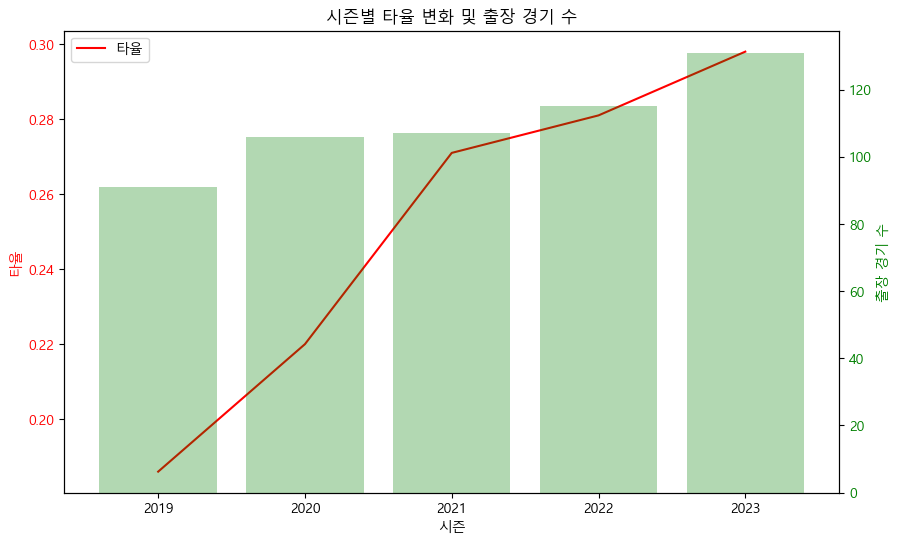

In [32]:
# 그래프 설정
fig, ax1 = plt.pyplot.subplots(figsize=(10, 6))

# 타율에 대한 선 그래프
ax1.plot(data.index, data['타율'], label='타율', color='red')
ax1.set_xlabel('시즌')
ax1.set_ylabel('타율', color='red')
ax1.set_title('시즌별 타율 변화 및 출장 경기 수')
ax1.tick_params(axis='y', labelcolor='red')

# 출장 경기 수에 대한 막대 그래프 (두 번째 y축 사용)
ax2 = ax1.twinx()
ax2.bar(data.index, data['경기'], alpha=0.3, color='green')
ax2.set_ylabel('출장 경기 수', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 레전드 표시
ax1.legend(loc='upper left')

# 그래프 표시
plt.pyplot.show()

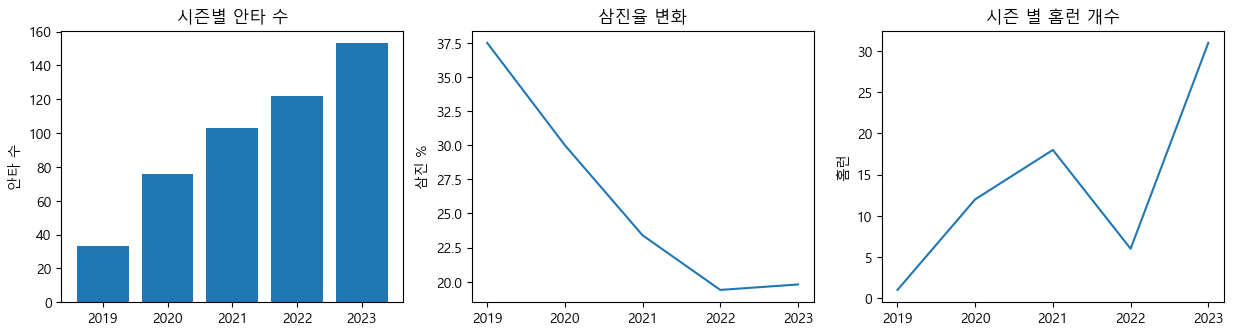

In [33]:
# 성장 그래프

fig = plt.pyplot.figure(figsize = (15,12))
ax1= fig.add_subplot(3,3,1)
ax2= fig.add_subplot(3,3,2)
ax3= fig.add_subplot(3,3,3)


ax1.bar(data.index,data['안타'])
ax1.set_title('시즌별 안타 수')
ax1.set_ylabel('안타 수')

ax2.plot(data['삼진%'],label ='삼진 율')
ax2.set_title('삼진율 변화')
ax2.set_ylabel('삼진 %')

ax3.plot(data['홈런'], label ='홈런')
ax3.set_title('시즌 별 홈런 개수')
ax3.set_ylabel('홈런')

plt.pyplot.show()

In [40]:
# 상관계수가 0.8이상인 컬럼 추출하기
corr = data.corr(numeric_only=True)
corr_columns = corr.index[abs(corr['홈런'])>=0.6].tolist()
print(type(corr_columns))
print(corr_columns)

<class 'list'>
['경기', '타석', '타수', '안타', '홈런', '홈런평균속도', '타구속도평균', '득점', '타점', '볼넷', '삼진', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '2루타', '고4', '병살', '도실', '볼넷%', '삼진%', '볼/삼', 'ISO', '타수/홈런', 'RC', 'RC/27', 'wRC', 'SPD', 'wRAA']


In [42]:
corr = data.corr()['홈런'].sort_values()
print(corr.tail(11))

wRAA     0.892778
wRC      0.900229
OPS      0.901257
타점       0.901298
득점       0.903389
RC/27    0.913674
RC       0.913750
WAR      0.919029
장타율      0.955288
ISO      0.973682
홈런       1.000000
Name: 홈런, dtype: float64


C:\Users\jsio2\AppData\Local\Temp\ipykernel_22424\3703614254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()['홈런'].sort_values()


C:\Users\jsio2\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\jsio2\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\jsio2\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


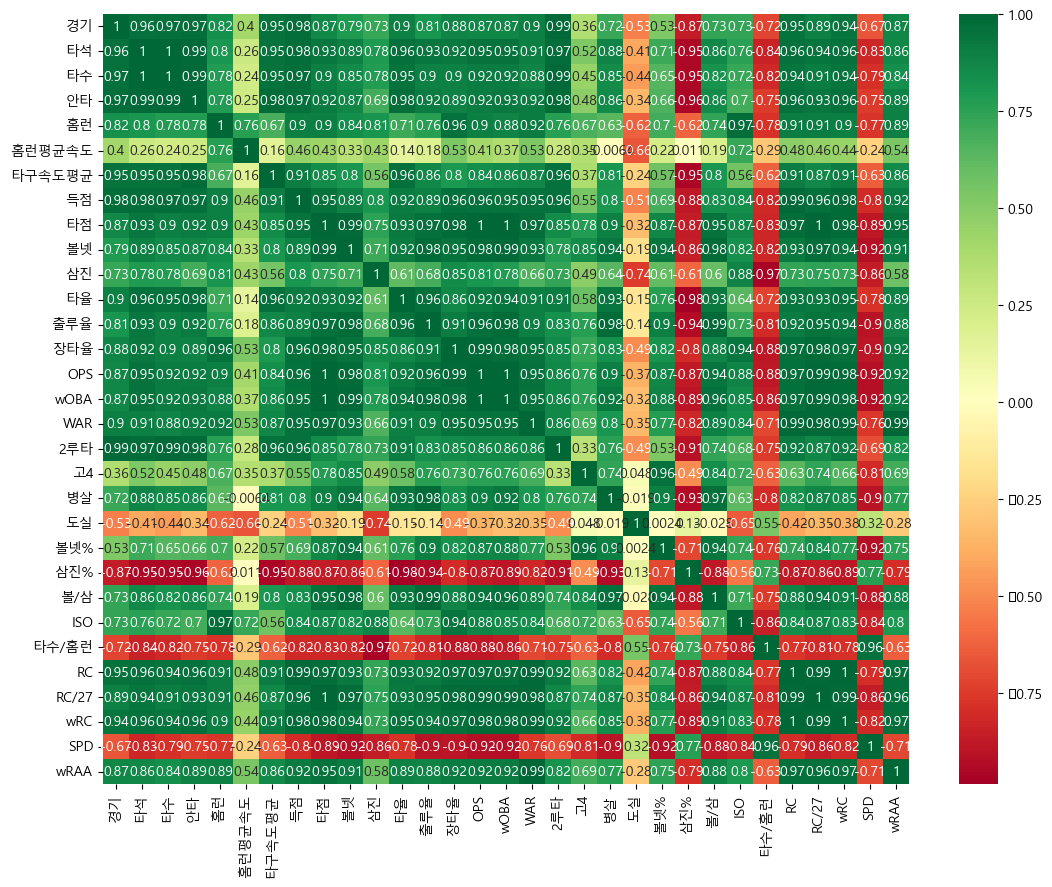

In [43]:
plt.pyplot.figure(figsize=(13,10))

heatmap = sns.heatmap(data[corr_columns].corr(numeric_only=True), annot = True, cmap="RdYlGn")

# 모델 생성

1. 데이터 준비
- feature select
- 데이터 분할
2. Model select (모델 선택)
3. Model Train (훈련)
4. Model evaluation (평가)
5. Predict (예측)

In [120]:
#최종 데이터 불러오기
data = pd.read_csv('./RohSiHwan_final_data.csv')
data.set_index('시즌', inplace = True)

In [121]:
# featurn select
features = ['타수/홈런', '타구속도평균','장타율','BABIP','ISO', '타석']
target = '홈런'

In [67]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [118]:
# LASSO 모델 초기화 및 훈련
# alpha 값은 모델의 복잡도를 조절합니다. 적절한 값을 찾기 위해 여러 값을 실험해 볼 수 있습니다.
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train, y_train)
predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, predictions)
print(f'Lasso: {lasso_mse}')

# 랜덤 포레스트 모델 초기화 및 훈련
RFR_model = RandomForestRegressor(n_estimators=100, random_state=42)
RFR_model.fit(X_train, y_train)
predictions = RFR_model.predict(X_test)
RFR_mse = mean_squared_error(y_test, predictions)
print(f'RandomForestRegressor: {RFR_mse}')

# ElasticNet 모델 초기화 및 훈련
elastic_model = ElasticNet(alpha=0.0, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train, y_train)
predictions = elastic_model.predict(X_test)
elastic_mse = mean_squared_error(y_test, predictions)
print(f'ElasticNet: {elastic_mse}')

# GradientBoostingRegressor 모델 초기화 및 훈련
gbr_model = GradientBoostingRegressor(n_estimators=10, learning_rate=0.0001, max_depth=10, random_state=42)
gbr_model.fit(X_train, y_train)
predictions = gbr_model.predict(X_test)
gbr_mse = mean_squared_error(y_test, predictions)
print(f'GradientBoostingRegressor: {gbr_mse}')

# XGBRegressor 모델 초기화 및 훈련
xgb_model = XGBRegressor(n_estimators=1, learning_rate=0.001, max_depth=100, random_state=42)
xgb_model.fit(X_train, y_train)
predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, predictions)
print(f'XGBRegressor: {xgb_mse}')

Lasso: 316.31305214140957
RandomForestRegressor: 103.63239999999999
ElasticNet: 560.4278525796517
GradientBoostingRegressor: 90.24809345406271
XGBRegressor: 90.2167532074318


C:\Users\jsio2\AppData\Local\Temp\ipykernel_8836\179877104.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elastic_model.fit(X_train, y_train)
C:\Users\jsio2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


In [137]:
#XGBRegressor가 젤 좋아  ElasticNet 사용하여 홈런 개수 예측
# 다음 시즌의 특성 값 추정 (과거 데이터 평균을 사용)
next_season_features = data[features].mean().values.reshape(1, -1)

In [140]:
# 다음 시즌 홈런 개수 예측
next_season_pred = xgb_model.predict(next_season_features)
print(f'2024 노시환 예상 홈런 수: {int(next_season_pred[0]+0.5)}개')

2024 노시환 예상 홈런 수: 15개
